In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
plt.style.use('seaborn-paper')
import seaborn as sns
import joblib

# plt.rcParams['font.family']='Times New Roman,Microsoft YaHei'# 设置字体族，中文为微软雅黑，英文为Times New Roman
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'  # 设置数学公式字体为stix
plt.rcParams["text.usetex"] = False
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

C:\Users\aa271\AppData\Local\Temp\ipykernel_25960\3475265594.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-paper')


In [2]:

BVOCs = [
    '1,3-丁二烯浓度',
    '丁烯浓度',
    '异戊二烯浓度',
    '戊烯浓度',
    '环己烯浓度',
    '苯乙烯浓度',
]
BVOCsc=['O3','PM1',
    '异戊二烯浓度',"NOx","SO2"
        ,'1,3-丁二烯浓度',
    '戊烯浓度',
    '丁烯浓度'
]
Tname= ['O$_3$','$PM_1$','Isoprene',"NO$_x$","SO$_2$",
    '1,3-Butadiene',
    'Butene',
    'Pentene']


VOCs = ['甲硫醇浓度', '1,3-丁二烯浓度', '丁烯浓度', '丙酮、丁烷浓度', '正丙醇浓度', '甲硫醚、乙硫醇浓度', '氯乙烷浓度', '异戊二烯浓度', '戊烯浓度', '戊烷、异戊烷浓度',
        '二甲基甲酰胺浓度', '甲酸乙酯浓度', '二硫化碳、丙硫醇浓度', '苯浓度', '环己烯浓度', '己烯、甲基环戊烷浓度', '正己烷、二甲基丁烷浓度', '乙硫醚、丁硫醇浓度', '甲苯浓度', '苯胺浓度',
        '二甲基二硫醚浓度', '1,1-二氯乙烯浓度', '甲基环己烷浓度', '正庚烷浓度', '三乙胺浓度', '乙酸正丙酯浓度', '二亚乙基三胺浓度', '苯乙烯浓度', '二甲苯、乙苯浓度', '1,3-二氯丙烯浓度',
        '正辛烷浓度', '乙酸正丁酯浓度', '己硫醇浓度', '二甲苯酚浓度', '三氯乙烯浓度', '二乙基苯浓度', '苯甲酸甲酯浓度', '磷酸三甲酯浓度', '正癸醇浓度', '二氯苯浓度', '二乙基苯胺浓度',
        '十一烷浓度', '四氯乙烯浓度', '正十二烷浓度', '二溴甲烷浓度', '1,2,4-三氯苯浓度', '正十三烷浓度', '1,2-二溴乙烷浓度']

In [3]:


#金海
Month = ["Aug", "Sept", "Oct", "Nov", "Dec", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul"]
#金海的合并
datajh = joblib.load("datanpjh.pkl")
datadicjh = joblib.load("datanpjh.pkl")
dataTVOCjh = joblib.load("TVOCjh")
dataTVOCVMDtempjh = pd.DataFrame(joblib.load("dataTVOCVMDjh.pkl"))
datatempjh = joblib.load('dataVMDjh.pkl')
datatempmjh = []
dataTVOCVMDjh = []
A = 0
B = 0
for i in range(len(datajh)):
    A = A + datadicjh[i].shape[0]
    datatempmjh.append(datatempjh.loc[B:(A - 1)].reset_index(drop=True))
    dataTVOCVMDjh.append(dataTVOCVMDtempjh.loc[B:(A - 1)].reset_index(drop=True))
    datatempmjh[i].index=datajh[i].index
    dataTVOCVMDjh[i].index=datajh[i].index
    B = B + datadicjh[i].shape[0]
Season = ["Summer", "Autumn", "Winter", "Spring"]

#崇明
#崇明的合并
datacm = joblib.load("datanpcm.pkl")
datadiccm = joblib.load("datanpcm.pkl")
dataTVOCcm = joblib.load("TVOCcm")
dataTVOCVMDtempcm = pd.DataFrame(joblib.load("dataTVOCVMDcm.pkl"))
datatempcm = joblib.load('dataVMDcm.pkl')
dataTVOCVMDcm = []
datatempmcm = []
A = 0
B = 0
for i in range(len(datacm)):
    A = A + datadiccm[i].shape[0]
    datatempmcm.append(datatempcm.loc[B:(A - 1)].reset_index(drop=True))
    dataTVOCVMDcm.append(dataTVOCVMDtempcm.loc[B:(A - 1)].reset_index(drop=True))
    if i!=11:
        datatempmcm[i].index=datacm[i].index
        dataTVOCVMDcm[i].index=datacm[i].index
    else:
        datatempmcm[i].index=datacm[i].index[:-1]
        dataTVOCVMDcm[i].index=datacm[i].index[:-1]
    B = B + datadiccm[i].shape[0]

In [4]:
# def process_time(df):
#     df["Hour_Min_Sec"] = df.index.time
#     df["Hour_Min"] = df.index.strftime('%H:%M')
#     df["Hour"] = df.index.hour
#     df["Month"] = df.index.month
#     df["Day"] = df.index.day
#
#     # 根据月份决定季节
#     conditions = [
#         (df["Month"].isin([3, 4, 5])),
#         (df["Month"].isin([6, 7, 8])),
#         (df["Month"].isin([9, 10, 11])),
#         (df["Month"].isin([12, 1, 2]))
#     ]
#     season_choices = ["Spring", "Summer", "Autumn", "Winter"]
#     df["Season"] = np.select(conditions, season_choices, default="Unknown")
#
#     return df


def process_time(df):
    df["Hour_Min_Sec"] = df.index.time
    df["Hour_Min"] = df.index.strftime('%H:%M')
    df["Hour"] = df.index.hour
    df["Month"] = df.index.strftime('%b')  # Get month abbreviation in English
    df["Day"] = df.index.strftime('%d')  # Get specific date

    # 根据月份决定季节
    conditions = [
        (df["Month"].isin(["Mar", "Apr", "May"])),
        (df["Month"].isin(["Jun", "Jul", "Aug"])),
        (df["Month"].isin(["Sep", "Oct", "Nov"])),
        (df["Month"].isin(["Dec", "Jan", "Feb"]))
    ]
    season_choices = ["Spring", "Summer", "Autumn", "Winter"]
    df["Season"] = np.select(conditions, season_choices, default="Unknown")

    return df


def combinedata(data,comname):
    combined_data = pd.concat(data, axis=0)
    # grouped = combined_data.groupby(comname).agg(["mean", "std"])
    grouped = combined_data
    # Extract hour, minute, and second and convert to total seconds
    if comname=="Hour":
        grouped['Datetime'] = grouped.index
        # grouped['seconds'] = grouped.index.astype(int) * 3600
        grouped['seconds'] = grouped['Datetime'].dt.hour * 3600 + grouped['Datetime'].dt.minute * 60 + grouped['Datetime'].dt.second
    else:
        # Convert datetime.time to datetime.datetime for dt accessor
        grouped['Datetime'] = pd.to_datetime(grouped.index.astype(str))
        grouped['seconds'] = grouped['Datetime'].dt.hour * 3600 + grouped['Datetime'].dt.minute * 60 + grouped['Datetime'].dt.second

    return grouped


In [5]:
# def replace_outliers_with_mean(df, column_name):
#     Q1 = df[column_name].quantile(0.25)
#     Q3 = df[column_name].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#
#     # 计算序列的均值
#     mean_value = df[column_name].mean()
#
#     # 将异常值替换为均值
#     df.loc[(df[column_name] < lower_bound) | (df[column_name] > upper_bound), column_name] = mean_value
#
#     return df

def addTVOCs(df, TVOC,i):
    # 将异常值替换为均值
    TVOC[i].index=df.index
    df["TVOCs"]=TVOC[i]
    df = process_time(df)

    return df

# def process_and_replace_outliers(df, column_name):
#     df = replace_outliers_with_mean(df, column_name)
#     df = process_time(df)
#     return df

datajh_time_processed = [addTVOCs(df, dataTVOCjh,i) for i,df in enumerate(datajh.values())]
datacm_time_processed = [addTVOCs(df, dataTVOCcm,i) for i,df  in enumerate(datacm.values())]
groupedjh = combinedata(datajh_time_processed, "Hour")
groupedcm = combinedata(datacm_time_processed, "Hour")

# datajhvmd_time_processed = [process_and_replace_outliers(df, '异戊二烯浓度') for df in datatempmjh]
# datacmvmd_time_processed = [process_and_replace_outliers(df, '异戊二烯浓度') for df in datatempmcm]
# groupedjhvmd = combinedata(datajhvmd_time_processed, "Hour")
# groupedcmvmd = combinedata(datacmvmd_time_processed, "Hour")

In [7]:
groupedjh.to_csv("groupedjh.csv")
groupedcm.to_csv("groupedcm.csv")

In [8]:
groupedjh[0:12000].to_csv("groupedjhtemp.csv")

<AxesSubplot: xlabel='PM1', ylabel='NOx'>

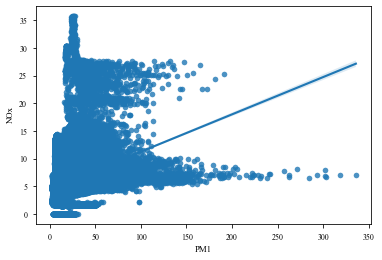

In [25]:
sns.regplot(x=groupedcm["PM1"],y=groupedcm["NOx"])

In [32]:
groupedcm[groupedcm['Hour']==6]["异戊二烯浓度"]

Time
2022-08-07 06:00:03    0.0
2022-08-07 06:00:10    0.0
2022-08-07 06:00:17    0.0
2022-08-07 06:00:24    2.0
2022-08-07 06:00:31    5.0
                      ... 
2023-07-25 06:59:26    0.0
2023-07-25 06:59:33    0.0
2023-07-25 06:59:40    0.0
2023-07-25 06:59:47    0.0
2023-07-25 06:59:54    0.0
Name: 异戊二烯浓度, Length: 6168, dtype: float64

(-2.0, 2.0)

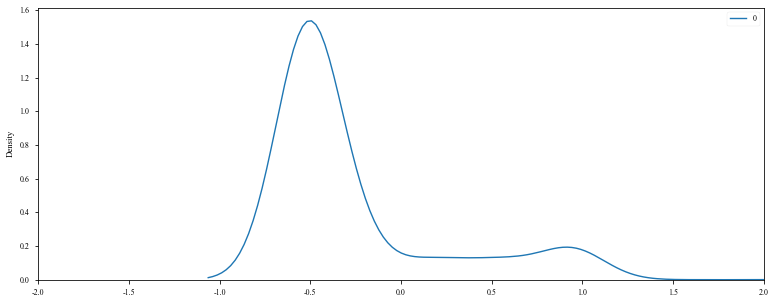

In [9]:
from sklearn.preprocessing import StandardScaler
data=groupedjhvmd[groupedjhvmd['Hour']==9]["异戊二烯浓度"]


fig, ax = plt.subplots(1, 1, figsize=(13, 5))
sns.kdeplot(StandardScaler().fit_transform(np.array(data).reshape(-1, 1)),ax=ax)
ax.set_xlim(-2,2)

In [7]:
groupedjhvmd

,甲硫醇浓度,"1,3-丁二烯浓度",丁烯浓度,丙酮、丁烷浓度,正丙醇浓度,甲硫醚、乙硫醇浓度,氯乙烷浓度,异戊二烯浓度,戊烯浓度,戊烷、异戊烷浓度,...,NO2,负氧离子,地面层净辐射,地面层温度,地面层湿度,Hour_Min_Sec,Hour_Min,Hour,Datetime,seconds
Time,,,,,,,,,,,,,,,,,,,,,
2022-08-05 11:25:46,0.176291,1.023420,6.039046e-02,0.841854,0.438125,0.447878,0.122658,3.039886,1.020860,2.445062,...,7.267937,417.780300,56.636985,36.724194,52.584619,11:25:46,11:25,11,2022-08-05 11:25:46,41146
2022-08-05 11:25:53,0.176318,1.023651,6.040172e-02,0.841826,0.438197,0.447832,0.122671,3.039886,1.020763,2.444974,...,7.267819,417.772907,56.642700,36.724215,52.584563,11:25:53,11:25,11,2022-08-05 11:25:53,41153
2022-08-05 11:26:00,0.176369,1.024082,6.042065e-02,0.841765,0.438301,0.447857,0.122706,3.039886,1.020372,2.444889,...,7.267619,417.746433,56.654085,36.724259,52.584452,11:26:00,11:26,11,2022-08-05 11:26:00,41160
2022-08-05 11:26:07,0.176434,1.024721,6.045804e-02,0.841673,0.438292,0.447952,0.122759,3.039886,1.019937,2.444730,...,7.267373,417.688696,56.671141,36.724324,52.584286,11:26:07,11:26,11,2022-08-05 11:26:07,41167
2022-08-05 11:26:14,0.176526,1.025512,6.051097e-02,0.841548,0.438263,0.448119,0.122835,3.039886,1.019362,2.444497,...,7.267088,417.597161,56.693861,36.724411,52.584064,11:26:14,11:26,11,2022-08-05 11:26:14,41174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-26 14:28:43,0.443493,0.344722,3.886397e-09,1.308443,0.397434,0.432002,0.406905,0.684223,0.003683,0.547738,...,4.440541,9861.501030,33.711708,30.500806,77.333297,14:28:43,14:28,14,2023-07-26 14:28:43,52123
2023-07-26 14:28:50,0.443297,0.344751,-3.896892e-09,1.308443,0.397518,0.432043,0.406678,0.683759,0.003682,0.547481,...,4.440471,9854.979715,33.710395,30.500734,77.333370,14:28:50,14:28,14,2023-07-26 14:28:50,52130
2023-07-26 14:28:57,0.443070,0.344760,3.886397e-09,1.308437,0.397633,0.432063,0.406484,0.683414,0.003681,0.547264,...,4.440415,9850.085354,33.709386,30.500680,77.333430,14:28:57,14:28,14,2023-07-26 14:28:57,52137


In [40]:
StandardScaler().fit_transform(np.array(data).reshape(-1, 1))

array([[-0.31115964],
       [-0.31115964],
       [-0.31115964],
       ...,
       [-0.31115964],
       [-0.31115964],
       [-0.31115964]])

<AxesSubplot: xlabel='Hour', ylabel='丁烯浓度'>

C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 19969 (\N{CJK UNIFIED IDEOGRAPH-4E01}) missing from current font.
  func(*args, **kwargs)
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 28911 (\N{CJK UNIFIED IDEOGRAPH-70EF}) missing from current font.
  func(*args, **kwargs)
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 27987 (\N{CJK UNIFIED IDEOGRAPH-6D53}) missing from current font.
  func(*args, **kwargs)
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  func(*args, **kwargs)
C:\Users\aa271\PycharmProjects\pythonProject\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 19969 (\N{CJK UNIFIED IDEOGRAPH-4E01}) missing from current font.

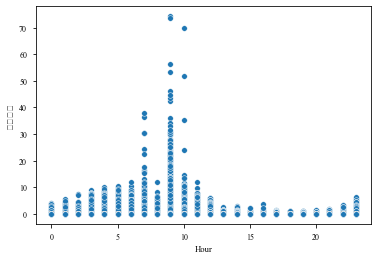

In [24]:
sns.scatterplot(y=groupedcm["丁烯浓度"],x=groupedcm["Hour"])

In [8]:
groupedjh[groupedjh['Hour']==8]

,甲硫醇浓度,"1,3-丁二烯浓度",丁烯浓度,丙酮、丁烷浓度,正丙醇浓度,甲硫醚、乙硫醇浓度,氯乙烷浓度,异戊二烯浓度,戊烯浓度,戊烷、异戊烷浓度,...,NO2,负氧离子,地面层净辐射,地面层温度,地面层湿度,Hour_Min_Sec,Hour_Min,Hour,Datetime,seconds
Time,,,,,,,,,,,,,,,,,,,,,
2022-08-06 08:00:06,1.00,3.0,0.0,1.000,1.500,0.00,0.300,0.0,0.0,0.00,...,13.910000,75.0,16.100000,33.000000,71.500000,08:00:06,08:00,8,2022-08-06 08:00:06,28806
2022-08-06 08:00:13,0.50,2.0,0.0,0.000,0.950,0.50,0.600,2.0,0.5,0.00,...,13.870000,150.0,16.100000,33.000000,71.500000,08:00:13,08:00,8,2022-08-06 08:00:13,28813
2022-08-06 08:00:20,1.00,5.0,0.0,0.000,0.900,0.00,0.000,9.0,0.0,1.00,...,13.830000,225.0,16.100000,33.000000,71.500000,08:00:20,08:00,8,2022-08-06 08:00:20,28820
2022-08-06 08:00:27,0.00,3.0,0.0,0.500,0.700,0.50,0.250,2.5,0.0,0.00,...,13.790000,300.0,16.100000,33.000000,71.500000,08:00:27,08:00,8,2022-08-06 08:00:27,28827
2022-08-06 08:00:34,0.00,5.0,0.0,0.000,1.300,0.00,0.600,0.0,0.0,0.00,...,13.750000,375.0,16.100000,33.000000,71.500000,08:00:34,08:00,8,2022-08-06 08:00:34,28834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-26 08:59:29,0.26,0.0,0.0,1.450,0.990,0.00,0.320,0.0,0.0,1.06,...,4.390556,600.0,132.448889,29.958889,75.777772,08:59:29,08:59,8,2023-07-26 08:59:29,32369
2023-07-26 08:59:36,0.00,0.0,0.0,1.260,0.695,0.11,0.265,0.0,0.0,0.94,...,4.412667,600.0,152.986667,29.956667,75.693327,08:59:36,08:59,8,2023-07-26 08:59:36,32376
2023-07-26 08:59:43,0.00,0.0,0.0,1.010,0.210,0.22,0.330,0.0,0.0,1.05,...,4.434778,600.0,173.524444,29.954444,75.608881,08:59:43,08:59,8,2023-07-26 08:59:43,32383


In [5]:
groupedjh

NameError: name 'groupedjh' is not defined

In [24]:
from matplotlib.patches import Patch
def plot_timeseries(data, ax, title, Column_Name,truename, grouped, groupplot,start,end):
    # p1 = ax.fill_between(grouped['seconds'],
    #                      grouped[(Column_Name, "mean")] - 1.96 * grouped[(Column_Name, "std")] / np.sqrt(len(data)),
    #                      grouped[(Column_Name, "mean")] + 1.96 * grouped[(Column_Name, "std")] / np.sqrt(len(data)),
    #                      color="gray", linewidth=1, alpha=0.25)
    #
    # p2 = ax.plot(groupplot['seconds'], groupplot[(Column_Name, "mean")], color="#75809C", linewidth=1,alpha=0.8)
    ax.scatter(groupplot['seconds'], groupplot[(Column_Name, "mean")], color="#75809C", alpha=0.8)
    # Set x-ticks for every half hour
    ticks = np.arange(0, 24 * 3600, 2300)  # 1800 seconds = 30 minutes
    ax.set_xticks(ticks)

    # Convert seconds back to HH:MM format for x-ticks
    labels = [f"{int(s / 3600):02d}:{int((s % 3600) / 60):02d}" for s in ticks]
    ax.set_xticklabels(labels, rotation=60, fontsize=10)

    ax.set_xlabel('Time (HH:MM)', fontsize=12)
    ax.set_ylabel(truename+r" ($μg/m^3$)", fontsize=14)
    ax.set_title(title, fontsize=15)

    # Add grid lines
    ax.grid(True, linestyle='--', which='both', color='gray', alpha=0.5)

    # Set the font size for y-axis ticks
    ax.tick_params(axis='y', labelsize=14)

    # Highlight the peak range
    ax.axvspan(time_to_seconds(start), time_to_seconds(end), color='#B95756', alpha=0.3)

    max_y = grouped[(Column_Name, "mean")].max()  # get max y-value for positioning the text
    ax.text(time_to_seconds(start), max_y * 0.8, start, color='black', fontsize=13, ha='center')
    ax.text(time_to_seconds(end), max_y * 0.8, end, color='black', fontsize=13, ha='center')

def time_to_seconds(time_str):
    """Convert HH:MM format string to seconds since midnight."""
    h, m = map(int, time_str.split(":"))
    return h * 3600 + m * 60

In [39]:
from matplotlib.patches import Patch
def plot_timeseries(data, ax, title, Column_Name,truename, grouped, groupplot,start,end):
    # p1 = ax.fill_between(grouped['seconds'],
    #                      grouped[(Column_Name, "mean")] - 1.96 * grouped[(Column_Name, "std")] / np.sqrt(len(data)),
    #                      grouped[(Column_Name, "mean")] + 1.96 * grouped[(Column_Name, "std")] / np.sqrt(len(data)),
    #                      color="gray", linewidth=1, alpha=0.25)
    #
    # p2 = ax.plot(groupplot['seconds'], groupplot[(Column_Name, "mean")], color="#75809C", linewidth=1,alpha=0.8)
    ax.scatter(groupplot['Hour'], groupplot[Column_Name], color="#75809C", alpha=0.8)


    # Set x-ticks for every half hour
    ticks = np.arange(0, 24, 1)  # 1800 seconds = 30 minutes
    ax.set_xticks(ticks)

    # Convert seconds back to HH:MM format for x-ticks
    labels = [str(s+1)+" Hour" for s in ticks]
    ax.set_xticklabels(labels, rotation=60, fontsize=10)

    ax.set_xlabel('Time (HH:MM)', fontsize=12)
    ax.set_ylabel(truename+r" ($μg/m^3$)", fontsize=14)
    ax.set_title(title, fontsize=15)

    # Add grid lines
    ax.grid(True, linestyle='--', which='both', color='gray', alpha=0.5)

    # Set the font size for y-axis ticks
    ax.tick_params(axis='y', labelsize=14)

    # # Highlight the peak range
    # ax.axvspan(time_to_seconds(start), time_to_seconds(end), color='#B95756', alpha=0.3)

    # max_y = grouped[Column_Name].max()  # get max y-value for positioning the text
    # ax.text(time_to_seconds(start), max_y * 0.8, start, color='black', fontsize=13, ha='center')
    # ax.text(time_to_seconds(end), max_y * 0.8, end, color='black', fontsize=13, ha='center')


In [41]:
from matplotlib.patches import Patch
def plot_timeseries(data, ax, title, Column_Name,truename, grouped, groupplot,start,end):
    # p1 = ax.fill_between(grouped['seconds'],
    #                      grouped[(Column_Name, "mean")] - 1.96 * grouped[(Column_Name, "std")] / np.sqrt(len(data)),
    #                      grouped[(Column_Name, "mean")] + 1.96 * grouped[(Column_Name, "std")] / np.sqrt(len(data)),
    #                      color="gray", linewidth=1, alpha=0.25)
    #
    # p2 = ax.plot(groupplot['seconds'], groupplot[(Column_Name, "mean")], color="#75809C", linewidth=1,alpha=0.8)
    sns.barplot(x=groupplot['Hour'], y=groupplot[Column_Name], color="#75809C",ax=ax)


    # Set x-ticks for every half hour
    ticks = np.arange(0, 24, 1)  # 1800 seconds = 30 minutes
    ax.set_xticks(ticks)

    # Convert seconds back to HH:MM format for x-ticks
    labels = [str(s+1)+" Hour" for s in ticks]
    ax.set_xticklabels(labels, rotation=60, fontsize=10)

    ax.set_xlabel('Time (HH:MM)', fontsize=12)
    ax.set_ylabel(truename+r" ($μg/m^3$)", fontsize=14)
    ax.set_title(title, fontsize=15)

    # Add grid lines
    ax.grid(True, linestyle='--', which='both', color='gray', alpha=0.5)

    # Set the font size for y-axis ticks
    ax.tick_params(axis='y', labelsize=14)

    # # Highlight the peak range
    # ax.axvspan(time_to_seconds(start), time_to_seconds(end), color='#B95756', alpha=0.3)

    # max_y = grouped[Column_Name].max()  # get max y-value for positioning the text
    # ax.text(time_to_seconds(start), max_y * 0.8, start, color='black', fontsize=13, ha='center')
    # ax.text(time_to_seconds(end), max_y * 0.8, end, color='black', fontsize=13, ha='center')

In [92]:
from matplotlib.patches import Patch
def plot_timeseries(data, ax, title, Column_Name,truename, grouped, groupplot,start,end):
    # p1 = ax.fill_between(grouped['seconds'],
    #                      grouped[(Column_Name, "mean")] - 1.96 * grouped[(Column_Name, "std")] / np.sqrt(len(data)),
    #                      grouped[(Column_Name, "mean")] + 1.96 * grouped[(Column_Name, "std")] / np.sqrt(len(data)),
    #                      color="gray", linewidth=1, alpha=0.25)
    #
    # p2 = ax.plot(groupplot['seconds'], groupplot[(Column_Name, "mean")], color="#75809C", linewidth=1,alpha=0.8)
    ax.scatter(groupplot['seconds'], groupplot[Column_Name], color="#75809C", alpha=0.8)
    # Set x-ticks for every half hour
    ticks = np.arange(0, 24 * 3600, 2300)  # 1800 seconds = 30 minutes
    ax.set_xticks(ticks)

    # Convert seconds back to HH:MM format for x-ticks
    labels = [f"{int(s / 3600):02d}:{int((s % 3600) / 60):02d}" for s in ticks]
    ax.set_xticklabels(labels, rotation=60, fontsize=10)

    ax.set_xlabel('Time (HH:MM)', fontsize=12)
    ax.set_ylabel(truename+r" ($μg/m^3$)", fontsize=14)
    ax.set_title(title, fontsize=15)

    # Add grid lines
    ax.grid(True, linestyle='--', which='both', color='gray', alpha=0.5)

    # Set the font size for y-axis ticks
    ax.tick_params(axis='y', labelsize=14)

    # Highlight the peak range
    ax.axvspan(time_to_seconds(start), time_to_seconds(end), color='#B95756', alpha=0.3)

    max_y = grouped[Column_Name].max()  # get max y-value for positioning the text
    ax.text(time_to_seconds(start), max_y * 0.8, start, color='black', fontsize=13, ha='center')
    ax.text(time_to_seconds(end), max_y * 0.8, end, color='black', fontsize=13, ha='center')

def time_to_seconds(time_str):
    """Convert HH:MM format string to seconds since midnight."""
    h, m = map(int, time_str.split(":"))
    return h * 3600 + m * 60

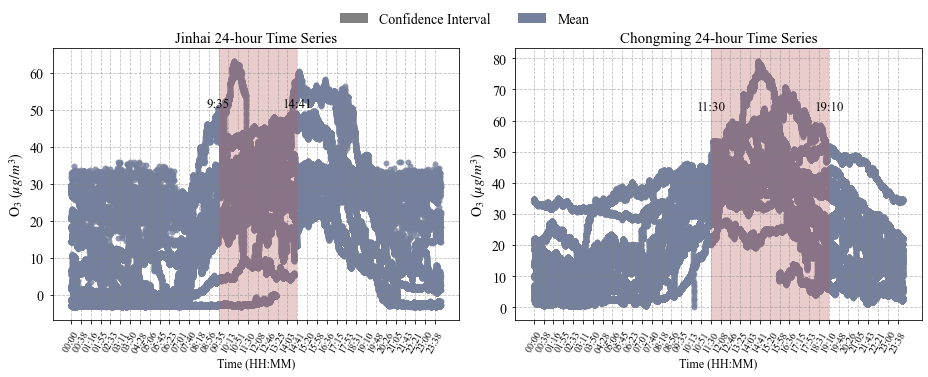

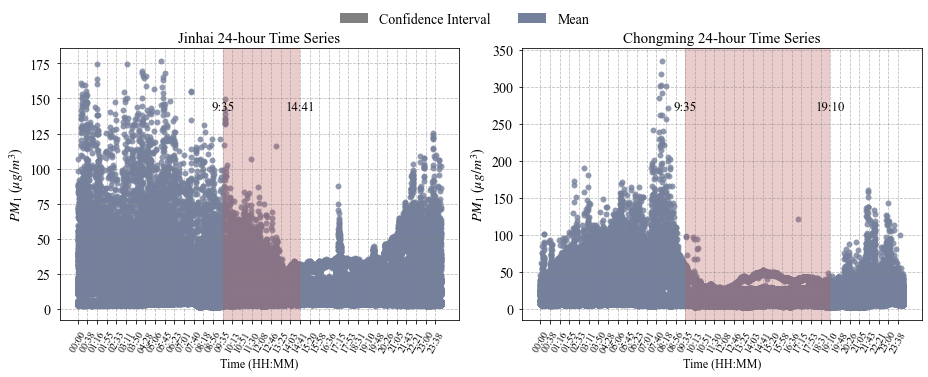

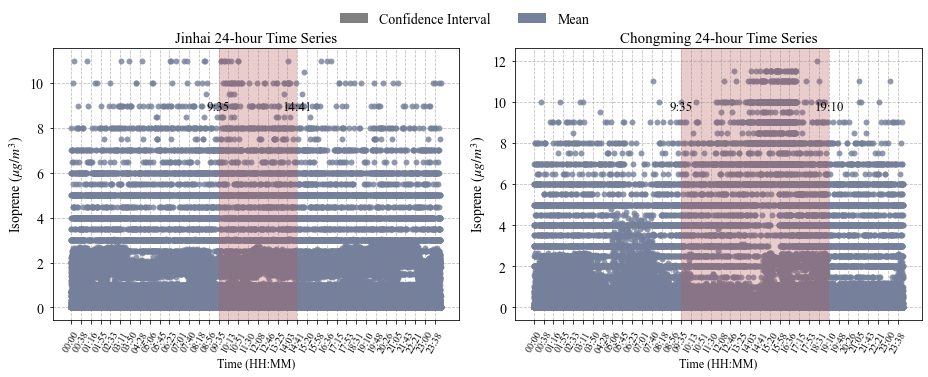

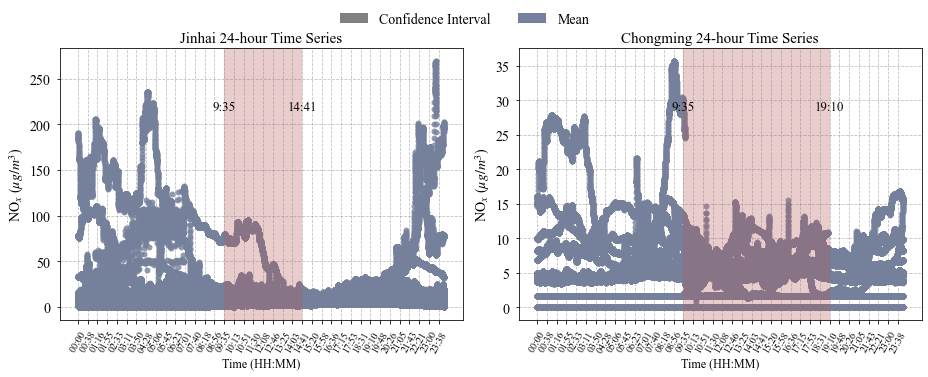

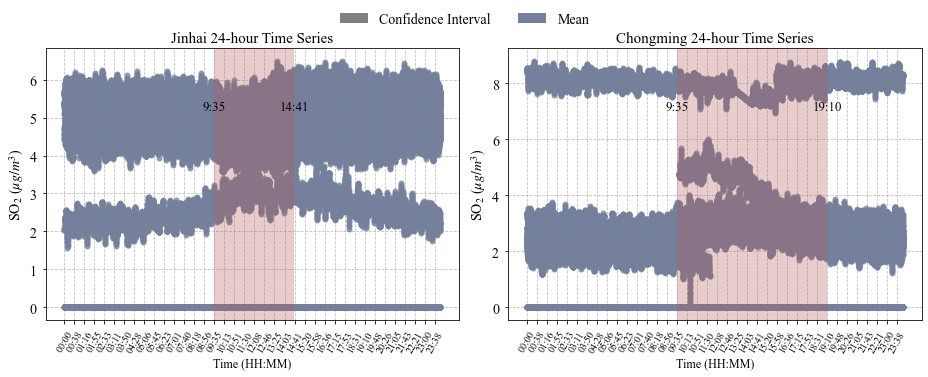

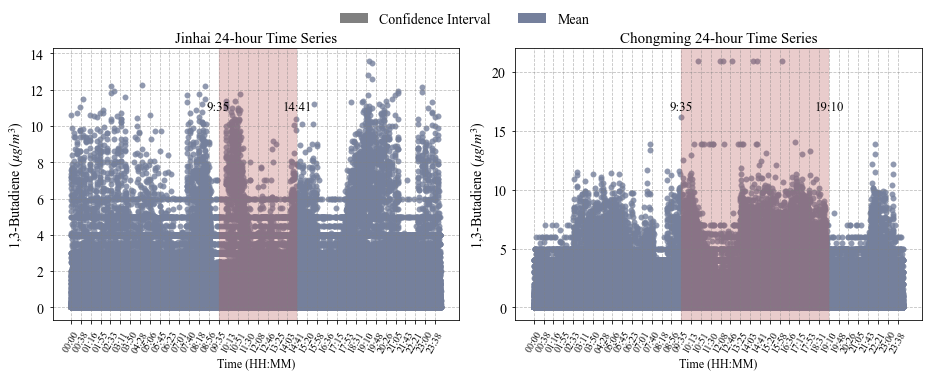

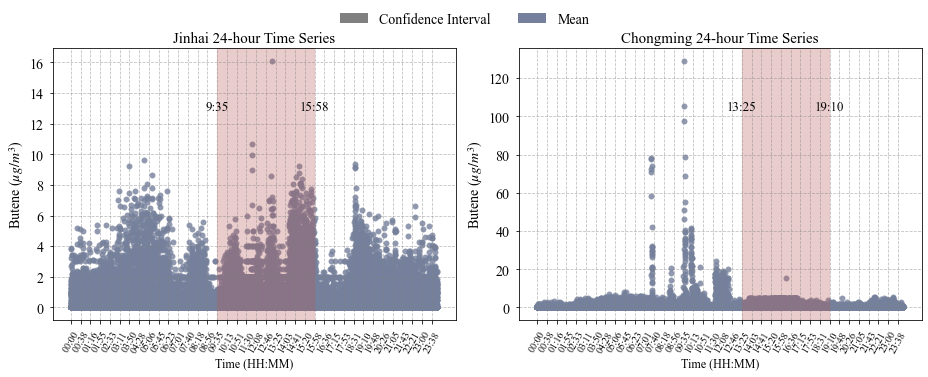

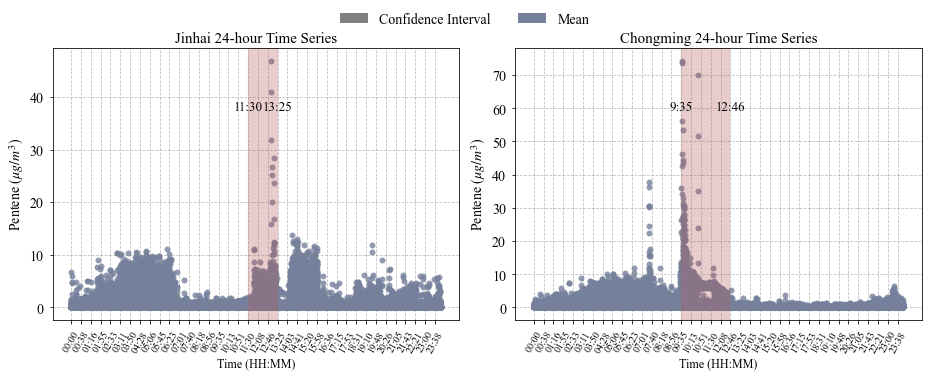

In [93]:
sten=[(["9:35","14:41"],["11:30","19:10"]),(["9:35","14:41"],["9:35","19:10"]),(["9:35","14:41"],["9:35","19:10"]),(["9:35","14:41"],["9:35","19:10"]),(["9:35","14:41"],["9:35","19:10"]),(["9:35","14:41"],["9:35","19:10"]),(["9:35","15:58"],["13:25","19:10"]),(["11:30","13:25"],["9:35","12:46"])]

for bcol in range(len(BVOCsc)):

    # Plot
    fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    plot_timeseries(datajh_time_processed, axes[0], 'Jinhai 24-hour Time Series', BVOCsc[bcol],Tname[bcol], groupedjh, groupedjh,sten[bcol][0][0],sten[bcol][0][1])
    plot_timeseries(datacm_time_processed, axes[1], 'Chongming 24-hour Time Series', BVOCsc[bcol],Tname[bcol],groupedcm, groupedcm,sten[bcol][1][0],sten[bcol][1][1])

    # Legend
    nameb = ["Confidence Interval", "Mean"]
    legend_elements = [
        Patch(facecolor="gray", label=nameb[0]),
        Patch(facecolor="#75809C", label=nameb[1])
    ]
    fig.legend(legend_elements, nameb, title='', frameon=False, loc="lower center", fontsize=14, ncol=2, bbox_to_anchor=(0.5, 0.95))

    plt.tight_layout()
    # plt.savefig(BVOCsc[bcol]+"时段综合barHour.png", bbox_inches='tight',dpi=600)
    plt.show()

In [32]:
def plot_timeseries2(data, ax,title, Column_Name,truename, grouped, groupplot,start,end,Column_Name2,truename2):
    p1 = ax.fill_between(grouped['seconds'],
                         grouped[(Column_Name, "mean")] - 1.96 * grouped[(Column_Name, "std")] / np.sqrt(len(data)),
                         grouped[(Column_Name, "mean")] + 1.96 * grouped[(Column_Name, "std")] / np.sqrt(len(data)),
                         color="gray", linewidth=1, alpha=0.25)

    p2 = ax.scatter(groupplot['seconds'], groupplot[(Column_Name, "mean")], color="#478058", alpha=0.2)

    # Set x-ticks for every half hour
    ticks = np.arange(0, 24 * 3600, 2300)  # 1800 seconds = 30 minutes
    ax.set_xticks(ticks)

    # Convert seconds back to HH:MM format for x-ticks
    labels = [f"{int(s / 3600):02d}:{int((s % 3600) / 60):02d}" for s in ticks]
    ax.set_xticklabels(labels, rotation=60, fontsize=10)

    ax.set_xlabel('Time (HH:MM)', fontsize=12)
    ax.set_ylabel(truename+r" ($μg/m^3$)", fontsize=14)
    ax.set_title(title, fontsize=15)

    # Add grid lines
    ax.grid(True, linestyle='--', which='both', color='gray', alpha=0.5)

    # Set the font size for y-axis ticks
    ax.tick_params(axis='y', labelsize=14)


    max_y = grouped[(Column_Name, "mean")].max()  # get max y-value for positioning the text
    ax.text(time_to_seconds(start), max_y * 0.8, start, color='black', fontsize=13, ha='center')
    ax.text(time_to_seconds(end), max_y * 0.8, end, color='black', fontsize=13, ha='center')


    ax2=ax.twinx()
    p3 = ax2.fill_between(grouped['seconds'],
                         grouped[(Column_Name2, "mean")] - 1.96 * grouped[(Column_Name2, "std")] / np.sqrt(len(data)),
                         grouped[(Column_Name2, "mean")] + 1.96 * grouped[(Column_Name2, "std")] / np.sqrt(len(data)),
                         color="gray", linewidth=1, alpha=0.25)

    p4 = ax2.scatter(groupplot['seconds'], groupplot[(Column_Name2, "mean")], color="#75809C", alpha=0.2)
    ax2.set_ylabel(truename2+r" ($μg/m^3$)", fontsize=14)

    # Highlight the peak range
    ax.axvspan(time_to_seconds(start), time_to_seconds(end), color='#B95756', alpha=0.3)

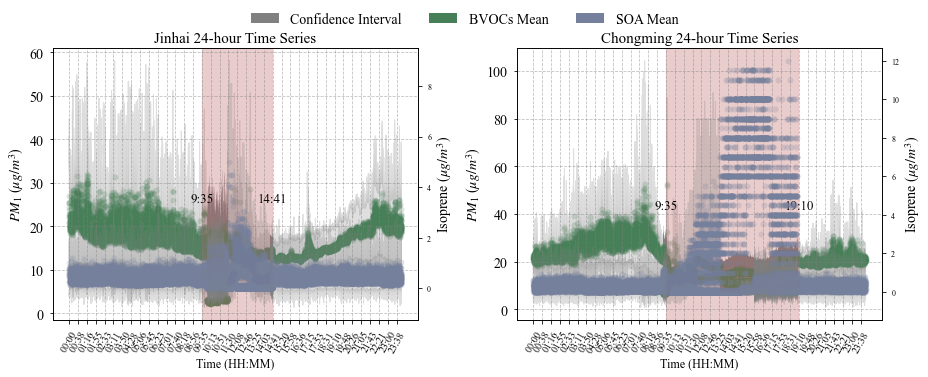

In [34]:
bcol1=1
bcol2=2

# Plot
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
plot_timeseries2(datajh_time_processed, axes[0], 'Jinhai 24-hour Time Series', BVOCsc[bcol1],Tname[bcol1], groupedjh, groupedjh,sten[bcol1][0][0],sten[bcol1][0][1], BVOCsc[bcol2],Tname[bcol2])
plot_timeseries2(datacm_time_processed, axes[1], 'Chongming 24-hour Time Series', BVOCsc[bcol1],Tname[bcol1],groupedcm, groupedcm,sten[bcol1][1][0],sten[bcol1][1][1], BVOCsc[bcol2],Tname[bcol2])

# Legend
nameb = ["Confidence Interval", "BVOCs Mean", "SOA Mean"]
legend_elements = [
    Patch(facecolor="gray", label=nameb[0]),
    Patch(facecolor="#478058", label=nameb[1]),
    Patch(facecolor="#75809C", label=nameb[1])
]
fig.legend(legend_elements, nameb, title='', frameon=False, loc="lower center", fontsize=14, ncol=3, bbox_to_anchor=(0.5, 0.95))

plt.tight_layout()
plt.savefig("时段综合sca.svg", bbox_inches='tight')
plt.savefig("时段综合sca.png", bbox_inches='tight',dpi=600)
plt.show()